<a href="https://colab.research.google.com/github/ArunPrasath1205/Analysis-using-Python/blob/main/Airbnb_Bookings_Analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from datetime import datetime
from datetime import date

import warnings
warnings.filterwarnings('ignore')

## Import drive and csv file we going to analyze.

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
filepath = "/content/drive/MyDrive/Almabetter/Module 01 Python for data science/Projects with Python/EDA Self Project/Airbnb/Airbnb NYC 2019.csv"

In [5]:
df = pd.read_csv(filepath)

##Data Understanding

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [7]:
df.shape

(48895, 16)

In [8]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [9]:
len(pd.unique(df["id"]))

48895

In [10]:
df["id"].nunique()

48895

In [11]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


##**Variables and their meaning in the dataframe**

####id
* Unique identification number of the Service Provider

####name 
* Name of the service provider

####host_id
* Unique ID of the host 

####host_name
* Name of the host 

####neighbourhood_group
* Region of particular country

####neighbourhood
* District or local region of the country

####latitude
* Geographical latitude

####longitude
* Geographical Longitude

####room_type
* Provides the type of the room

####price
* Rate for stay

####minimum_nights
* Minimum nights a guest should book

####number_of_reviews
* Number of reviews updated by the Guest 

####last_review
* Date of last_review by the Guest

####reviews_per_month
* Reviews that obtained by the property per month

####calculated_host_listing_count


####availability_365
* Availability of the Rooms in a year 

In [12]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [13]:
df["last_review"].nunique()

1764

In [14]:
df.drop('last_review', axis=1, inplace=True)

In [15]:
df.drop('reviews_per_month', axis=1, inplace=True)

In [16]:
df.shape

(48895, 14)

In [17]:
df.isnull().sum()

id                                 0
name                              16
host_id                            0
host_name                         21
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
calculated_host_listings_count     0
availability_365                   0
dtype: int64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  calculated_host_listings_count  

In [19]:
df["Total cost of living"] = df["price"] * df["minimum_nights"]

In [20]:
df["Total cost of living"]

0         149
1         225
2         450
3          89
4         800
         ... 
48890     140
48891     160
48892    1150
48893      55
48894     630
Name: Total cost of living, Length: 48895, dtype: int64

In [21]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,Total cost of living
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,4.889500e+04
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,7.143982,112.781327,1.284433e+03
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,32.952519,131.622289,1.180456e+04
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000e+00
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,1.000000,0.000000,1.350000e+02
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,1.000000,45.000000,3.000000e+02
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.000000,227.000000,7.345000e+02
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,327.000000,365.000000,1.170000e+06


* Price minimum zero
* Availability minimum zero 

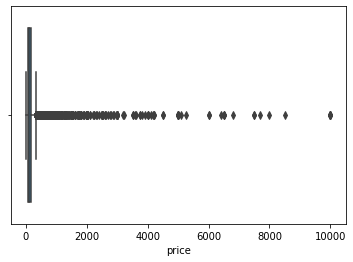

In [22]:
sns.boxplot(df["price"])

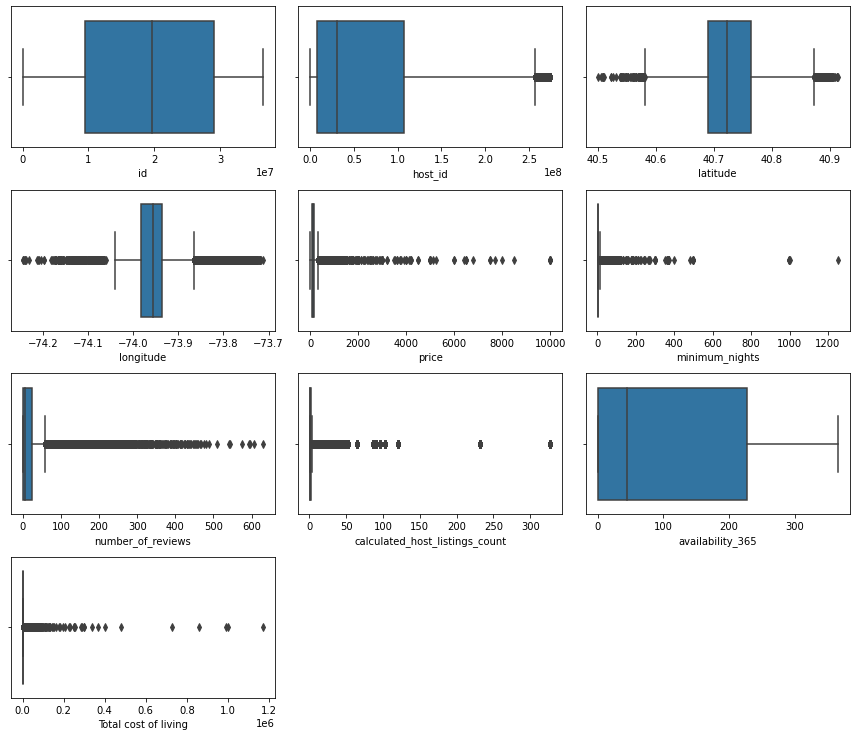

In [23]:
n=1
plt.figure(figsize=(12,15))
for i in range(15):
  if df.iloc[:,i].dtype == int or df.iloc[:,i].dtype== float:
    plt.subplot(6,3,n)
    n+=1
    sns.boxplot(df.iloc[:,i])
    plt.tight_layout();

In [24]:
df.shape

(48895, 15)

In [25]:
np.percentile(df['price'],25)

69.0

In [26]:
np.percentile(df['price'],50)

106.0

In [27]:
np.percentile(df['price'],75)

175.0

In [28]:
175-69

106

In [29]:
69-(1.5*106)

-90.0

In [30]:
175+(1.5*106)

334.0

In [31]:
# Outliers deletion
# IQR = Inter Quartile Range
# a = lower Quartile 
# b = upper Quartile

Q1 = np.percentile(df["price"],25)
Q3 = np.percentile(df["price"],75)

IQR = Q3-Q1

a = Q1 - (1.5 * IQR)

b = Q3 + (1.5 * IQR)

df = df[ (df.price < b) & (df.price > a)]




In [32]:
df.shape

(45918, 15)

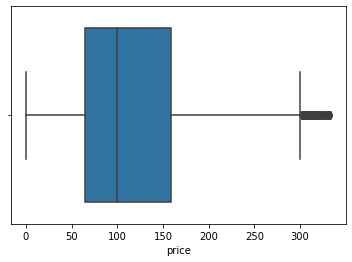

In [33]:
sns.boxplot(df["price"])

In [34]:
# Now outliers removed in the price

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45918 entries, 0 to 48894
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              45918 non-null  int64  
 1   name                            45903 non-null  object 
 2   host_id                         45918 non-null  int64  
 3   host_name                       45897 non-null  object 
 4   neighbourhood_group             45918 non-null  object 
 5   neighbourhood                   45918 non-null  object 
 6   latitude                        45918 non-null  float64
 7   longitude                       45918 non-null  float64
 8   room_type                       45918 non-null  object 
 9   price                           45918 non-null  int64  
 10  minimum_nights                  45918 non-null  int64  
 11  number_of_reviews               45918 non-null  int64  
 12  calculated_host_listings_count  

In [37]:
df.isnull().sum()

id                                 0
name                              15
host_id                            0
host_name                         21
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
calculated_host_listings_count     0
availability_365                   0
Total cost of living               0
dtype: int64

## Top Host in airbnb 

In [56]:
top_host = df.groupby(["host_name"]).count().iloc[:,0:1].sort_values("id", ascending = False )


In [57]:
top_host.head(10)

,id
host_name,
Michael,383
David,368
John,276
Sonder (NYC),272
Alex,253
Sarah,221
Daniel,212
Maria,197
Jessica,185


In [60]:
top_host.rename(columns = {"id" : "number of property owned" }, inplace = True )

In [61]:
top_host

,number of property owned
host_name,
Michael,383
David,368
John,276
Sonder (NYC),272
Alex,253
...,...
Jennifer & Inam,1
Jennie And Dan,1
Jenni & Eric,1


## Comparision of neighbourhood_group

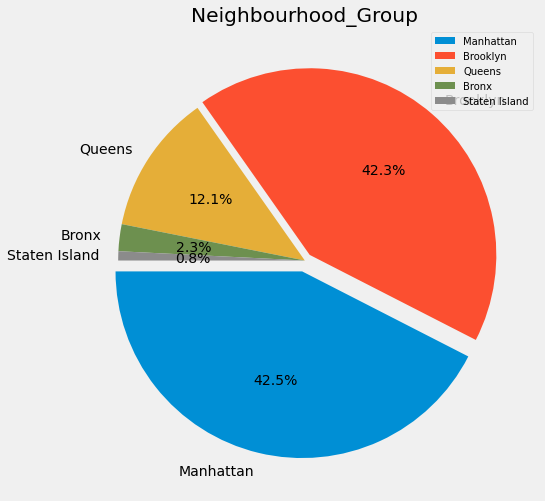

In [38]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(8,8))
plt.title("Neighbourhood_Group")
g=plt.pie(df.neighbourhood_group.value_counts(),labels=df.neighbourhood_group.value_counts().index,autopct='%1.1f%%',startangle=180,explode=(0.06,0.04,0,0,0))
plt.legend(labels=df.neighbourhood_group.value_counts().index,loc="best",fontsize=10)
plt.show()